# BOOM BIKES - LINEAR REGRESSION ASSIGNMENT

<hr>
<font color = blue>
    Initial Program
    <ul>
        <li> Importing the relevant dependencies/libraries and read the raw day.csv file
    </ul>
</font>
<hr>

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.api as sm
from scipy.stats import pearsonr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [2]:
def fn_print_message(msg):
    print("-" * 80)
    print(">> " + str(msg))
    print("-" * 80)
    print("")

### INITIAL DATASET ANALYSIS

In [3]:
df_bike = pd.read_csv("data/day.csv")
fn_print_message(f"df_bike Shape: {df_bike.shape}")
df_bike.head()

--------------------------------------------------------------------------------
>> df_bike Shape: (730, 16)
--------------------------------------------------------------------------------



,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
fn_print_message("Checking for Null Values")
df_bike.info()

--------------------------------------------------------------------------------
>> Checking for Null Values
--------------------------------------------------------------------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cn

In [5]:
fn_print_message("View Initial summary data for all numeric columns")
df_bike.describe()

--------------------------------------------------------------------------------
>> View Initial summary data for all numeric columns
--------------------------------------------------------------------------------



,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
fn_print_message("View Distinct Values to detemine Categorical/Continuous Columns")
msg_cont_list = []
msg_cat_list = []
for col in df_bike.columns:
    unique_col = set(df_bike[col])
    if len(unique_col) <= 12:
        msg_cat_list.append(f"Column '{col}' is Categorical with {len(unique_col)} unique values: [{unique_col}]")
    else:
        msg_cont_list.append(f"Column '{col}' is Continuous with Count of unique values: [{len(unique_col)}]")
print("\n".join(msg_cat_list))
print("")
print("\n".join(msg_cont_list))        

--------------------------------------------------------------------------------
>> View Distinct Values to detemine Categorical/Continuous Columns
--------------------------------------------------------------------------------

Column 'season' is Categorical with 4 unique values: [{1, 2, 3, 4}]
Column 'yr' is Categorical with 2 unique values: [{0, 1}]
Column 'mnth' is Categorical with 12 unique values: [{1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}]
Column 'holiday' is Categorical with 2 unique values: [{0, 1}]
Column 'weekday' is Categorical with 7 unique values: [{0, 1, 2, 3, 4, 5, 6}]
Column 'workingday' is Categorical with 2 unique values: [{0, 1}]
Column 'weathersit' is Categorical with 3 unique values: [{1, 2, 3}]

Column 'instant' is Continuous with Count of unique values: [730]
Column 'dteday' is Continuous with Count of unique values: [730]
Column 'temp' is Continuous with Count of unique values: [498]
Column 'atemp' is Continuous with Count of unique values: [689]
Column 'hum' is

<hr>
<font color = blue >
    <b> Observations: Initial Dataset Analysis </b>
        <ul>
        <li> No Null Values were observed for any of the column data
        <li> 'instant' is an index and 'dteday' is already represented by other columns. These can be ignored
        <li> 'casual' and 'registered' can be ignored since we are focussing on the Final Coung 'cnt'
        <li> Categorical Columns List: ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
        <li> Continuous Columns List: ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'] </li>
            
</font>
</hr>

### CATEGORICAL/CONTINUOUS COLUMN ANALYSIS

--------------------------------------------------------------------------------
>> Box Plot Analysis of Categorical Columns against target column
--------------------------------------------------------------------------------



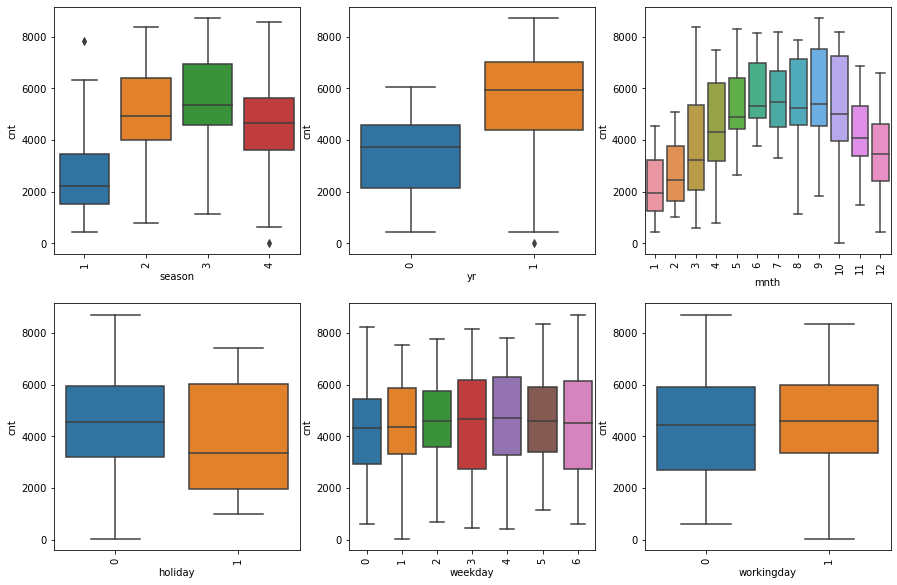

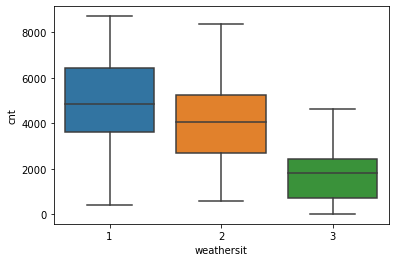

In [7]:
fn_print_message("Box Plot Analysis of Categorical Columns against target column")
# Define boxplot function to loop through list of columns
def fn_boxplot_countplot(df, col_list, ncol, y):
    list_len = len(col_list)

    fig, axes = plt.subplots(list_len//ncol, ncol, figsize=(15,10))

    for column, index in zip(col_list, range(len(col_list))):
        ax = sns.boxplot(data=df, x=column, y=y, ax=axes[index//ncol,index%ncol])
        axes[index//ncol,index%ncol].tick_params(axis='x', rotation=90)

    # plt.subplots_adjust(top = 1.5, bottom=0.01, hspace=.6, wspace=0.2)
    plt.show()

fn_boxplot_countplot(df_bike, ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday'], 3, "cnt")
sns.boxplot(data=df_bike, x='weathersit', y='cnt')
plt.show()

--------------------------------------------------------------------------------
>> Pair Plot Analysis of Categorical Columns against target column
--------------------------------------------------------------------------------



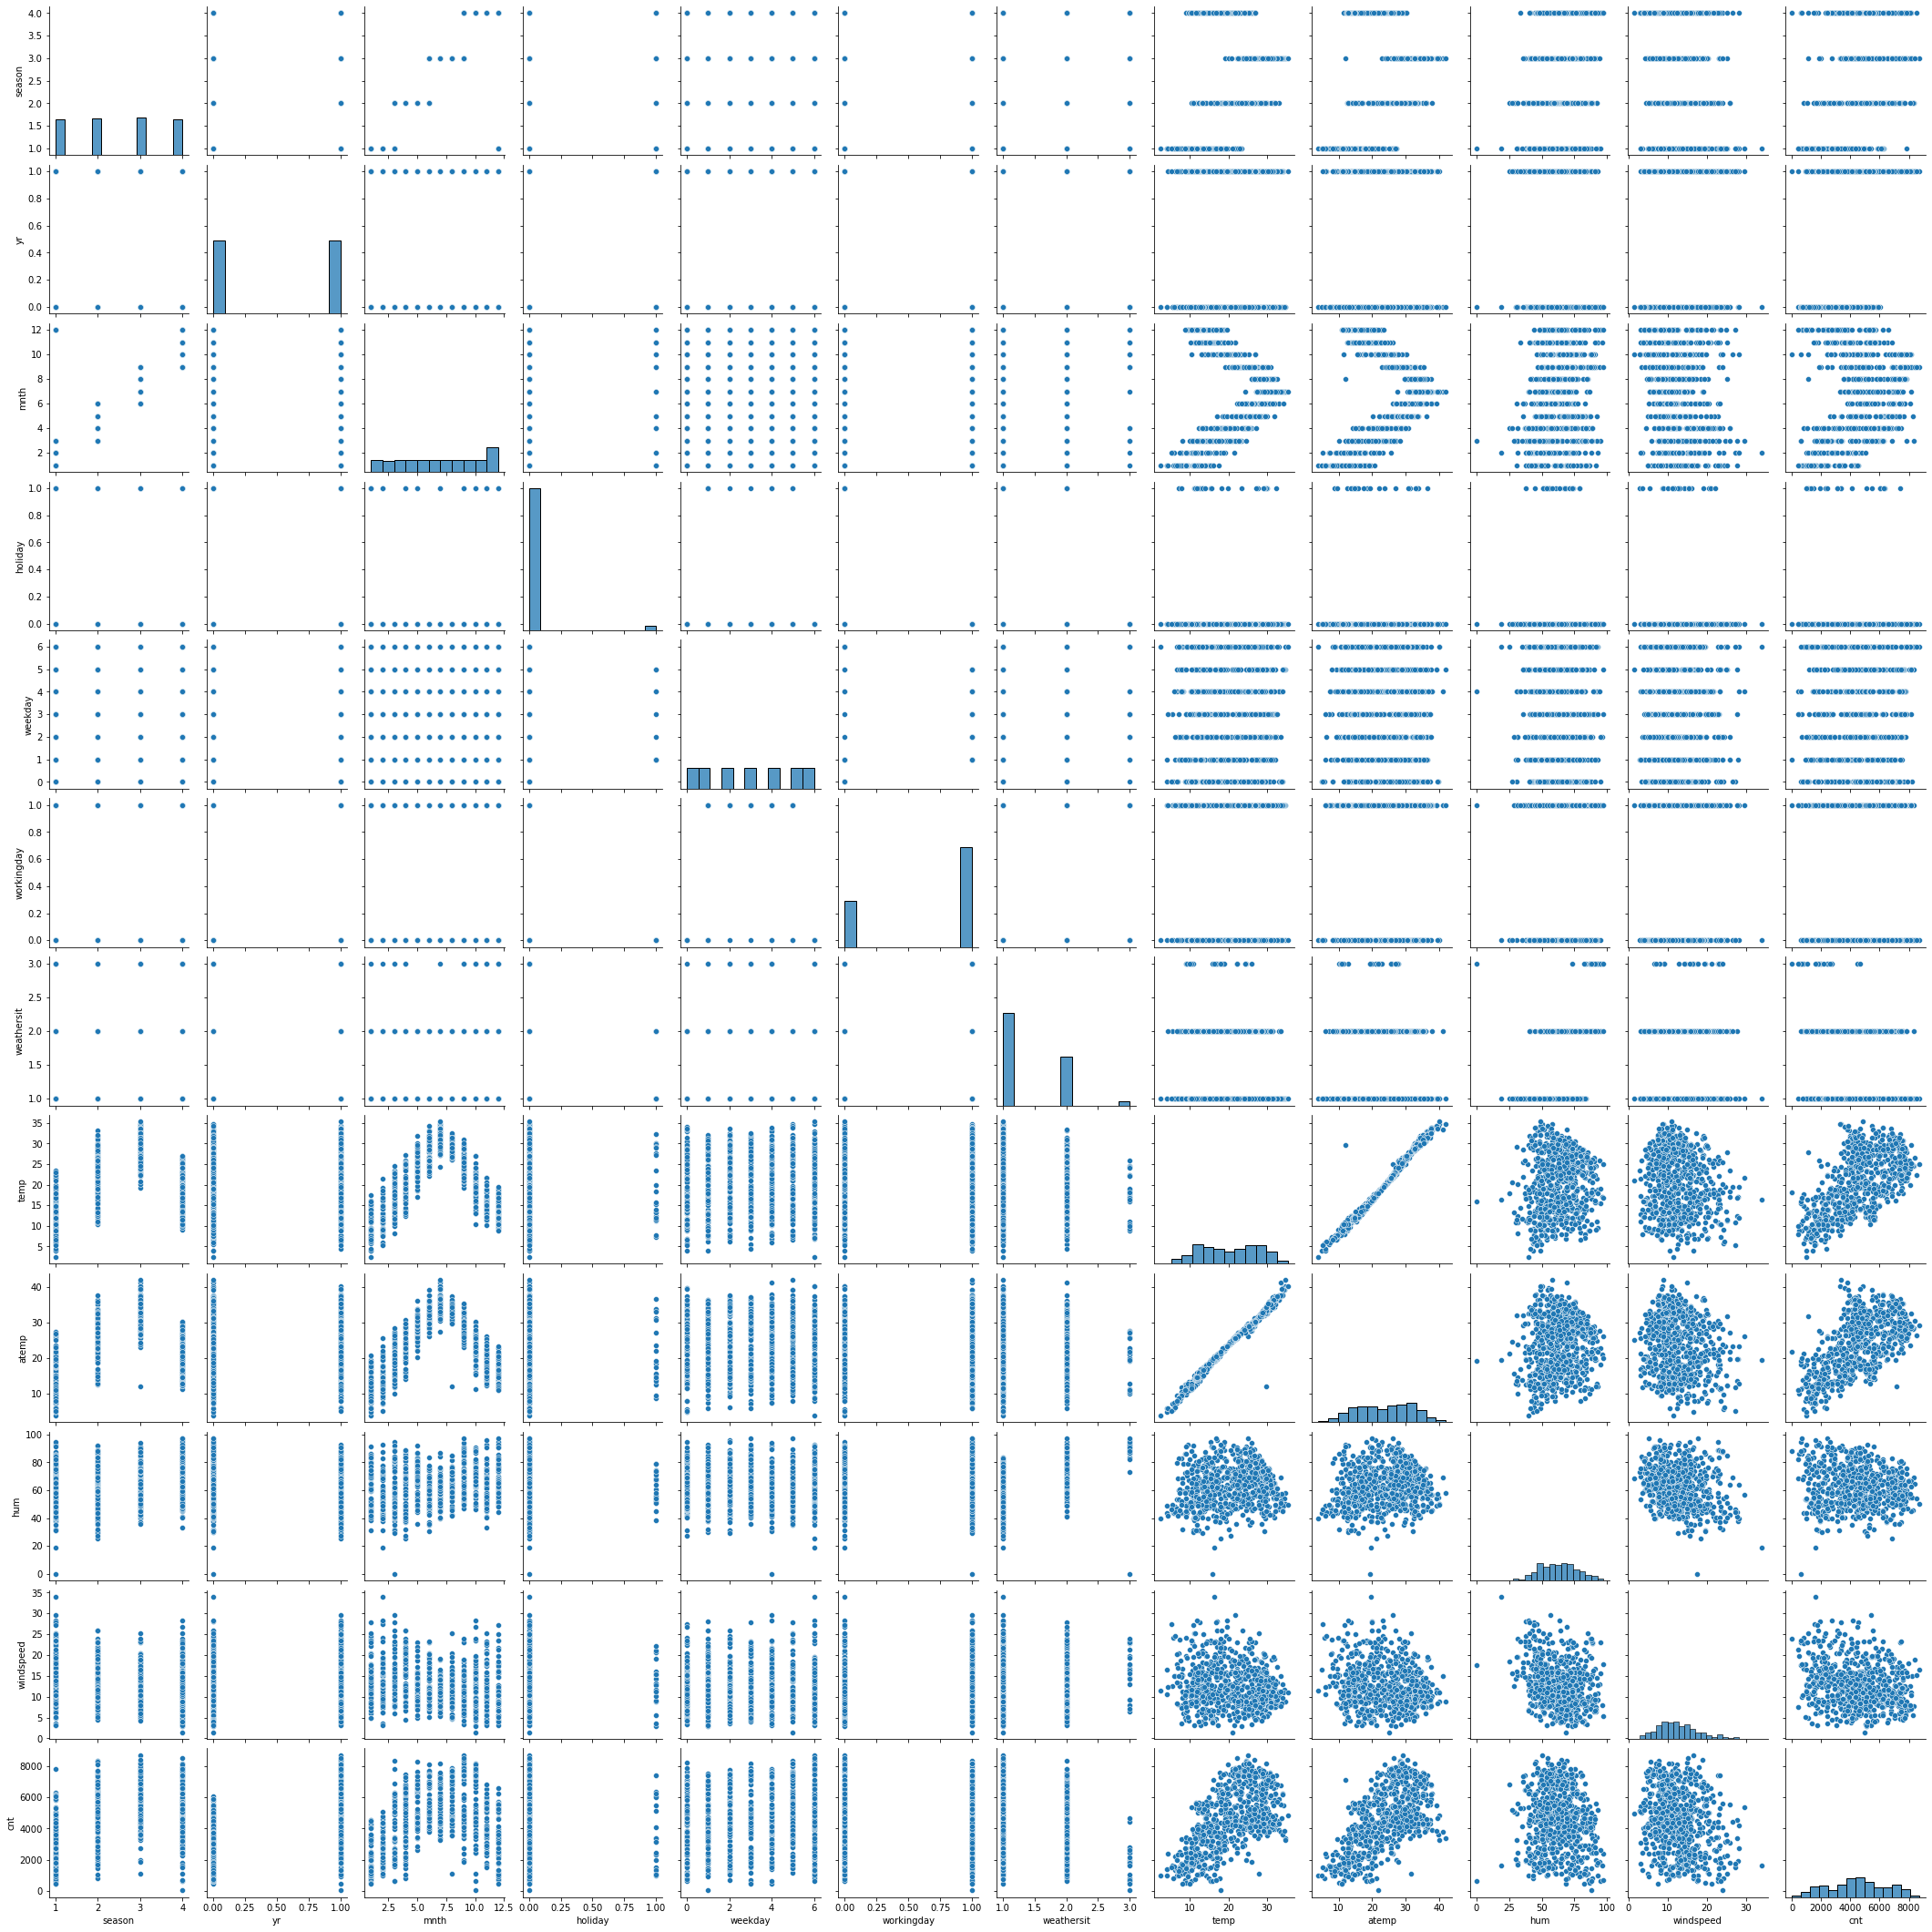

In [8]:
fn_print_message("Pair Plot Analysis of Categorical Columns against target column")
cat_col_list = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
cont_col_list = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
sns.pairplot(df_bike[cat_col_list + cont_col_list])
plt.show()

--------------------------------------------------------------------------------
>> Heatmap Analysis
--------------------------------------------------------------------------------



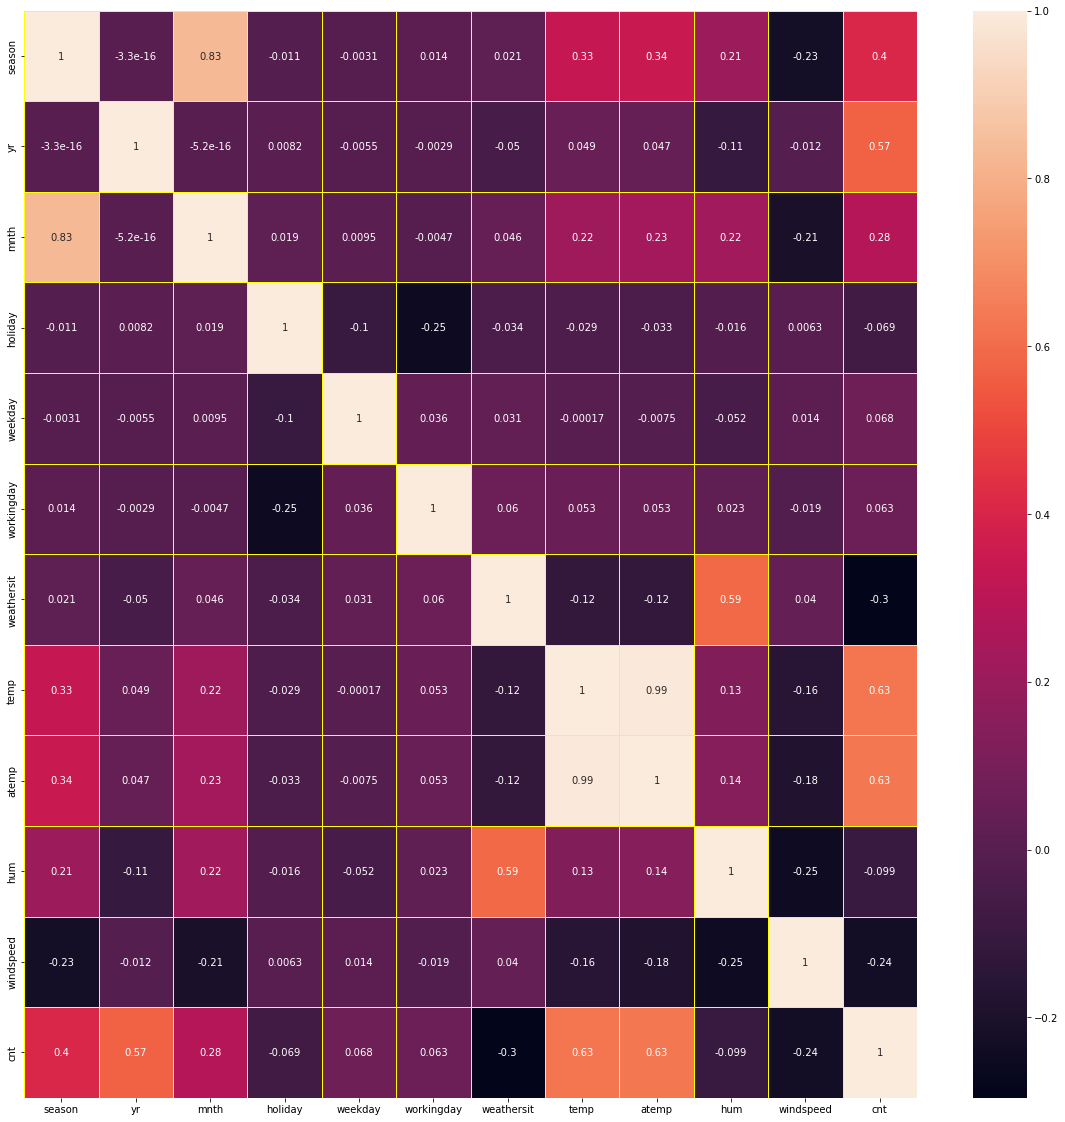

In [9]:
fn_print_message("Heatmap Analysis")
cat_col_list = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
cont_col_list = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
plt.figure(figsize=(20,20))
sns.heatmap(df_bike[cat_col_list + cont_col_list].corr(), annot=True, linewidths=1, linecolor='yellow')
plt.show()

--------------------------------------------------------------------------------
>> Histogram of all Numeric Variables
--------------------------------------------------------------------------------



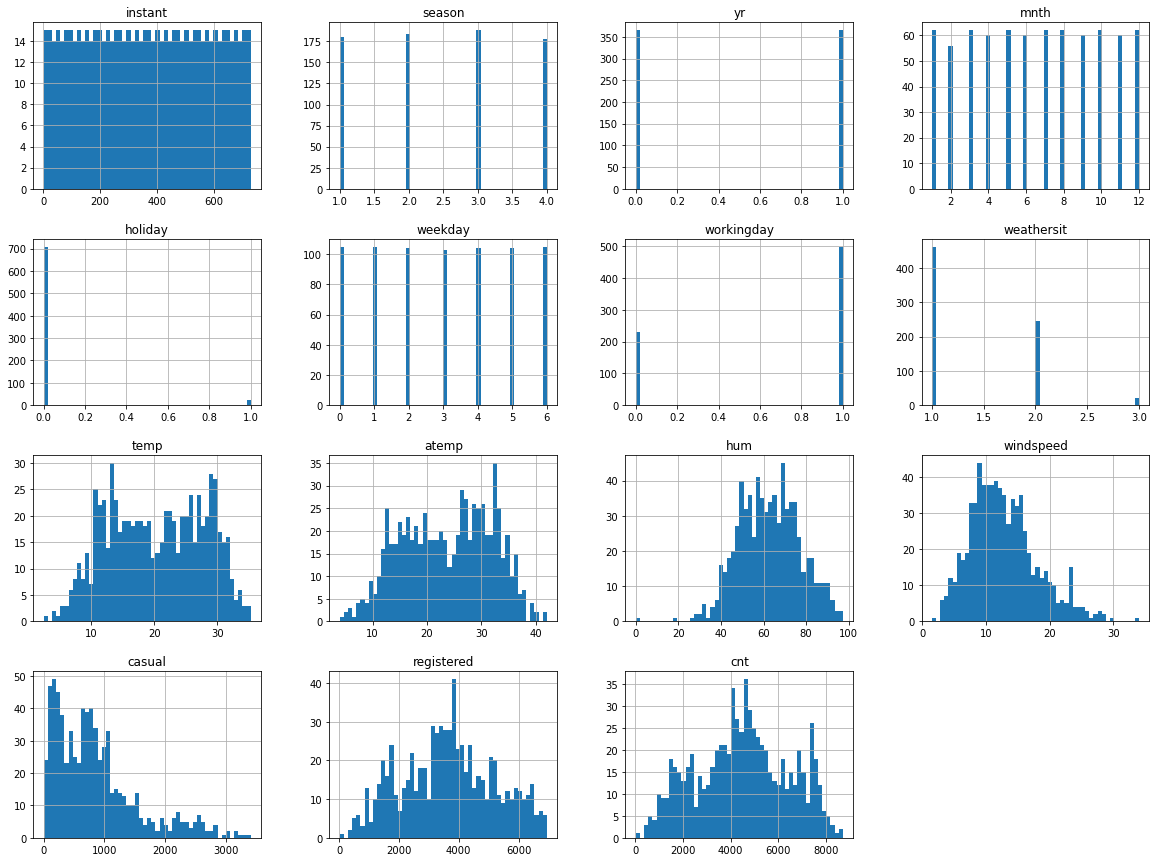

In [10]:
fn_print_message("Histogram of all Numeric Variables")
df_bike.hist(bins=50, figsize=(20, 15))
plt.show()

### Observations: Categorical and Continuous variable Analysis
<hr>
<font color = blue >
        <li> Demand picks up in Spring and rises in summer and fall and then decreases in Winter
        <li> Demand picked up in 2019 compared to 2018
        <li> Demand dips on working days
        <li> Demand declines as weather deteriorates as expected
        <li> Weekday, Workingday, temp, atemp have high correlation with 'cnt' which means these drive up demand
        <li> Month and Season have high correlation as expected
        <li> 'temp' and 'atemp' have high correlation. We can drop 'temp' as 'atemp' has more influence in user's decision making
            
</font>
</hr>


### DROP UNWANTED COLUMNS

In [11]:
fn_print_message("Dropping unwanted columns as per above analysis")
drop_col_list = ['instant', 'dteday', 'temp', 'casual', 'registered']

df_bike_clean = df_bike.drop(columns=drop_col_list)

df_bike_clean.head()

--------------------------------------------------------------------------------
>> Dropping unwanted columns as per above analysis
--------------------------------------------------------------------------------



,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,11.46350,43.6957,12.522300,1600


### DUMMY ENCODING OF CATEGORIAL VARIABLES
<hr>
<font color = blue >
        <li> 'yr', 'holiday' and 'workingday' are already encoded
        <li> Encoding is required for 'season', 'mnth', 'weekday', 'weathersit'
         
</font>

In [12]:
fn_print_message("One Hot Encoding of applicable categorical columns")
encode_col_list = ['season', 'mnth', 'weekday', 'weathersit']

df_bike_final = df_bike_clean.copy()
for col in encode_col_list:
    df_bike_final = pd.concat([df_bike_final, pd.get_dummies(df_bike_final[col], prefix=col,  drop_first=True)], axis = 1).drop(columns=col)

df_bike_final.dtypes

--------------------------------------------------------------------------------
>> One Hot Encoding of applicable categorical columns
--------------------------------------------------------------------------------



yr                int64
holiday           int64
workingday        int64
atemp           float64
hum             float64
windspeed       float64
cnt               int64
season_2          uint8
season_3          uint8
season_4          uint8
mnth_2            uint8
mnth_3            uint8
mnth_4            uint8
mnth_5            uint8
mnth_6            uint8
mnth_7            uint8
mnth_8            uint8
mnth_9            uint8
mnth_10           uint8
mnth_11           uint8
mnth_12           uint8
weekday_1         uint8
weekday_2         uint8
weekday_3         uint8
weekday_4         uint8
weekday_5         uint8
weekday_6         uint8
weathersit_2      uint8
weathersit_3      uint8
dtype: object

In [13]:
fn_print_message("Printing df_bike_final post categorical column encoding")
print("df_bike_final shape: ", df_bike_final.shape)
df_bike_final.head()

--------------------------------------------------------------------------------
>> Printing df_bike_final post categorical column encoding
--------------------------------------------------------------------------------

df_bike_final shape:  (730, 29)


,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,1,0,0,0,0,0


--------------------------------------------------------------------------------
>> Heatmap Analysis
--------------------------------------------------------------------------------



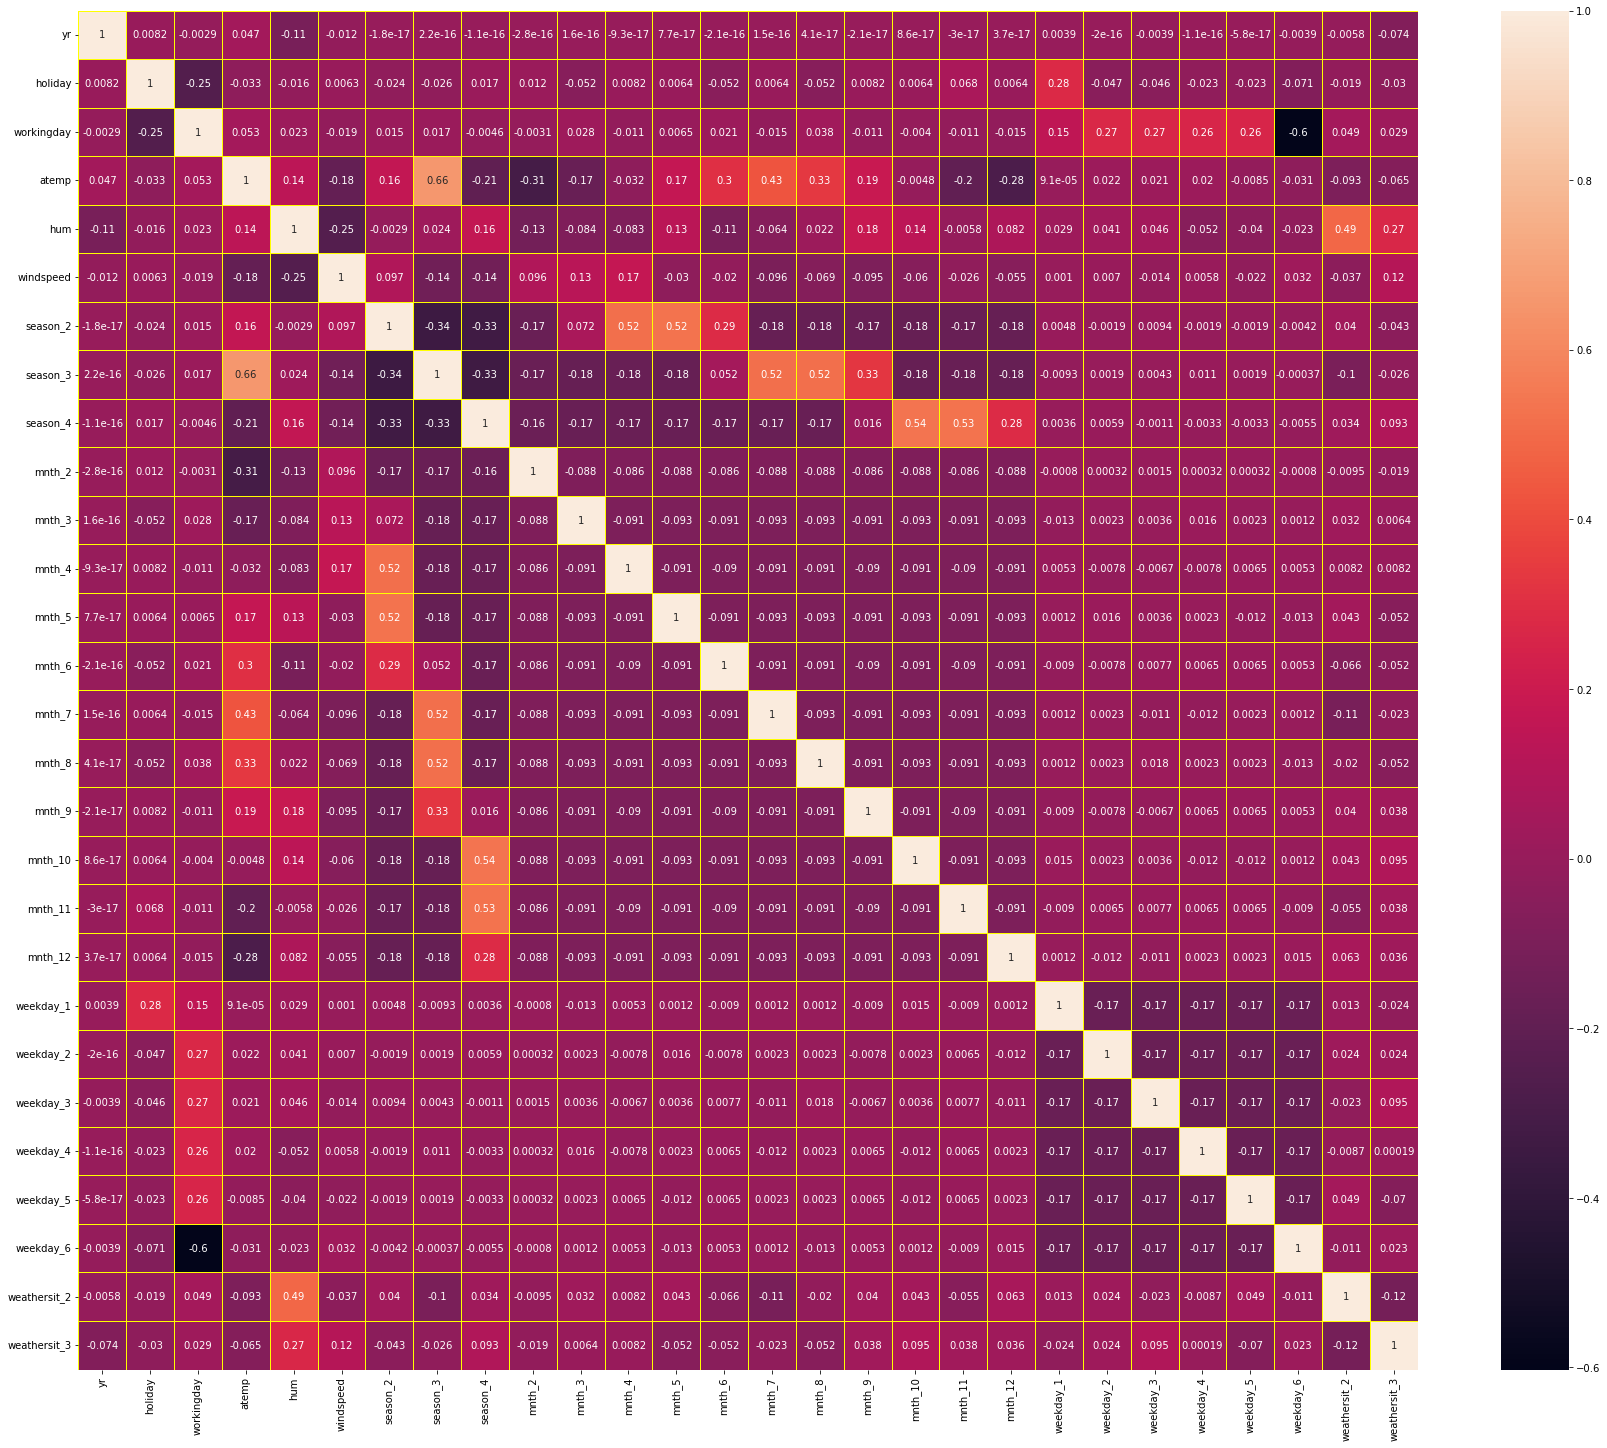

In [14]:
fn_print_message("Heatmap Analysis")
plt.figure(figsize=(30,25))
sns.heatmap(df_bike_final.drop(columns='cnt').corr(), annot=True, linewidths=1, linecolor='yellow')
plt.show()

### DIVIDE DATA INTO TRAINING AND TEST SETS

In [15]:
fn_print_message("Splitting the Final Dataset into Training (70%) and Test(30%) datasets ")
df_train_init, df_test = train_test_split(df_bike_final, train_size=0.70, random_state=100)
print("df_train_init shape: ", df_train_init.shape)
print("df_test shape : ", df_test.shape)

--------------------------------------------------------------------------------
>> Splitting the Final Dataset into Training (70%) and Test(30%) datasets 
--------------------------------------------------------------------------------

df_train_init shape:  (510, 29)
df_test shape :  (220, 29)


### NUMERICAL COLUMN SCALING/ NORMALIZATION
<hr>
<font color = blue >
        <li> 'atemp', 'hum' and 'windspeed' will be scaled using min-max scaling
 
</font>

In [16]:
fn_print_message("Applying MIN/MAX scaling to numeric columns")
num_col_list = ['atemp', 'hum', 'windspeed', 'cnt']
scaler = MinMaxScaler()
df_train = df_train_init.copy()
df_train[num_col_list] = scaler.fit_transform(df_train[num_col_list])
print("df_train shape: ", df_train.shape)
df_train.head()


--------------------------------------------------------------------------------
>> Applying MIN/MAX scaling to numeric columns
--------------------------------------------------------------------------------

df_train shape:  (510, 29)


,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,1,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.200348,0.498067,0.663106,0.204096,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,1,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.318819,0.751824,0.380981,0.191095,1,0,0,...,0,0,0,0,0,0,1,0,1,0


In [17]:
fn_print_message("Dividing the dataset based on Dependent and Independent variables")
y_train = df_train['cnt']
X_train = df_train.drop(columns='cnt')

print("y_train shape: ", y_train.shape)
print("X_train shape: ", X_train.shape)

--------------------------------------------------------------------------------
>> Dividing the dataset based on Dependent and Independent variables
--------------------------------------------------------------------------------

y_train shape:  (510,)
X_train shape:  (510, 28)


In [18]:
print(y_train.head())
X_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64


,yr,holiday,workingday,atemp,hum,windspeed,season_2,season_3,season_4,mnth_2,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.766351,0.725633,0.264686,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
728,1,0,0,0.200348,0.498067,0.663106,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,1,0,0,0,...,0,0,0,0,0,0,0,1,1,0
111,0,0,1,0.318819,0.751824,0.380981,1,0,0,0,...,0,0,0,0,0,0,1,0,1,0


### RFE: RECURSIVE FEATURE ELIMINATION

In [19]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [20]:
rfe_col_num = 13
fn_print_message(f"Evaluating top {rfe_col_num} RFE Predictors")
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, rfe_col_num)             
rfe = rfe.fit(X_train, y_train)

pd.DataFrame({'Column': X_train.columns, 'Support': rfe.support_, 'Ranking': rfe.ranking_}).sort_values(by=['Ranking', 'Column'])

--------------------------------------------------------------------------------
>> Evaluating top 13 RFE Predictors
--------------------------------------------------------------------------------



,Column,Support,Ranking
3,atemp,True,1
1,holiday,True,1
4,hum,True,1
15,mnth_8,True,1
16,mnth_9,True,1
6,season_2,True,1
8,season_4,True,1
26,weathersit_2,True,1
27,weathersit_3,True,1
25,weekday_6,True,1


### MODEL BUILD 1 : WITH RFE VARIABLES

In [21]:
fn_print_message(f"Printing top {rfe_col_num} RFE Predictors")
train_col_list = X_train.columns[rfe.support_]
list(train_col_list)

--------------------------------------------------------------------------------
>> Printing top 13 RFE Predictors
--------------------------------------------------------------------------------



['yr',
 'holiday',
 'workingday',
 'atemp',
 'hum',
 'windspeed',
 'season_2',
 'season_4',
 'mnth_8',
 'mnth_9',
 'weekday_6',
 'weathersit_2',
 'weathersit_3']

In [22]:
X_train_rfe = X_train[train_col_list]
X_train_rfe.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_2,season_4,mnth_8,mnth_9,weekday_6,weathersit_2,weathersit_3
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,0,0,0
426,1,0,0,0.438975,0.640189,0.255342,0,0,0,0,1,1,0
728,1,0,0,0.200348,0.498067,0.663106,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,1,0,0,0,1,1,0
111,0,0,1,0.318819,0.751824,0.380981,1,0,0,0,0,1,0


In [23]:
# Function to Create Linear Model
def fn_bike_lm_model(X_train):
    fn_print_message("Adding a constant variable to X_train and Applying the Linear Model")
    X_train_sm = sm.add_constant(X_train)
    bike_model = sm.OLS(y_train, X_train_sm).fit()
    print(bike_model.summary())
    return bike_model, X_train_sm
    
bike_model_1, X_train_sm_1 = fn_bike_lm_model(X_train_rfe)

--------------------------------------------------------------------------------
>> Adding a constant variable to X_train and Applying the Linear Model
--------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     201.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          1.66e-188
Time:                        11:26:03   Log-Likelihood:                 507.94
No. Observations:                 510   AIC:                            -987.9
Df Residuals:                     496   BIC:                            -928.6
Df Model:                          13                                         
Covariance Type:            nonrobust                  

In [24]:
# Define function to calculate VIF
def fn_calculate_vif(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending  = False)
    return vif

fn_print_message("Display VIF Values")
fn_calculate_vif(X_train_rfe )

--------------------------------------------------------------------------------
>> Display VIF Values
--------------------------------------------------------------------------------



,Features,VIF
4,hum,16.89
3,atemp,9.83
2,workingday,5.02
5,windspeed,3.82
11,weathersit_2,2.14
0,yr,2.02
10,weekday_6,1.90
6,season_2,1.84
7,season_4,1.74
8,mnth_8,1.55


### MODEL BUILD 2 : DROPPING HUMIDITY (High VIF)
<hr>
<font color = blue >
        <li> 'atemp' has a high coeeficient and hence will not be dropped despite high VIF
 
</font>

In [25]:
X_train_rfe_2 = X_train_rfe.drop(columns='hum')
bike_model_2, X_train_sm_2 = fn_bike_lm_model(X_train_rfe_2)


--------------------------------------------------------------------------------
>> Adding a constant variable to X_train and Applying the Linear Model
--------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     208.9
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          2.43e-185
Time:                        11:26:03   Log-Likelihood:                 497.63
No. Observations:                 510   AIC:                            -969.3
Df Residuals:                     497   BIC:                            -914.2
Df Model:                          12                                         
Covariance Type:            nonrobust                  

In [26]:
fn_print_message("Display VIF Values")
fn_calculate_vif(X_train_rfe_2)

--------------------------------------------------------------------------------
>> Display VIF Values
--------------------------------------------------------------------------------



,Features,VIF
3,atemp,6.12
2,workingday,4.38
4,windspeed,3.56
0,yr,2.02
5,season_2,1.83
9,weekday_6,1.77
7,mnth_8,1.55
10,weathersit_2,1.54
6,season_4,1.53
8,mnth_9,1.30


### MODEL BUILD 3 : DROPPING 'HOLIDAY' (P-Value > 0.05)

In [27]:
X_train_rfe_3 = X_train_rfe_2.drop(columns='holiday')
bike_model_3, X_train_sm_3 = fn_bike_lm_model(X_train_rfe_3)

--------------------------------------------------------------------------------
>> Adding a constant variable to X_train and Applying the Linear Model
--------------------------------------------------------------------------------

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     226.4
Date:                Wed, 15 Jun 2022   Prob (F-statistic):          9.15e-186
Time:                        11:26:03   Log-Likelihood:                 495.82
No. Observations:                 510   AIC:                            -967.6
Df Residuals:                     498   BIC:                            -916.8
Df Model:                          11                                         
Covariance Type:            nonrobust                  

In [28]:
fn_print_message("Display VIF Values")
fn_calculate_vif(X_train_rfe_3)

--------------------------------------------------------------------------------
>> Display VIF Values
--------------------------------------------------------------------------------



,Features,VIF
2,atemp,6.02
1,workingday,4.06
3,windspeed,3.45
0,yr,2.02
4,season_2,1.83
8,weekday_6,1.69
6,mnth_8,1.55
9,weathersit_2,1.54
5,season_4,1.52
7,mnth_9,1.30


In [29]:
final_model = bike_model_3
final_x_train_sm = X_train_sm_3

<hr>
<font color = blue >
    <b> MODEL SUMMARY </b>
        <ul>
        <li> All P-Values < 0.05 (~0) and VIF Values <= 6.02
        <li> Final Model has a R-squared = 0.833
            
</font>
</hr>

### Residual Analysis

--------------------------------------------------------------------------------
>> Residual Analysis on Training Set
--------------------------------------------------------------------------------



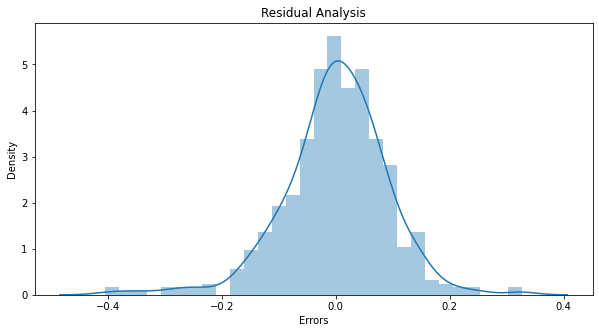

In [30]:
fn_print_message("Residual Analysis on Training Set")
y_train_pred = final_model.predict(final_x_train_sm)

plt.figure(figsize=(10, 5))
sns.distplot(y_train - y_train_pred)
plt.xlabel('Errors')  
plt.title('Residual Analysis')
plt.show()

--------------------------------------------------------------------------------
>> Regplot on Residual Data
--------------------------------------------------------------------------------



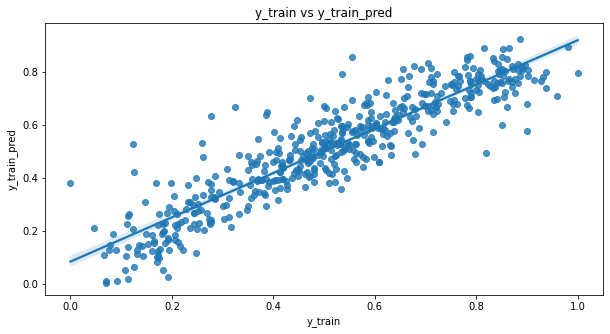

In [31]:
fn_print_message("Regplot on Residual Data")

plt.figure(figsize=(10, 5))
sns.regplot(y_train, y_train_pred)
plt.title('y_train vs y_train_pred')
plt.xlabel('y_train')  
plt.ylabel('y_train_pred')
plt.show()

<hr>
<font color = blue >
    <b> RESIDUAL ANALYSYS SUMMARY </b>
        <ul>
        <li> Error Distribution is normally distributed across 0
        <li> Residual points are equal distributed across predicted value
            
</font>
</hr>

### PREDICTION ON TEST DATA

In [32]:
# num_col_list = ['atemp', 'hum', 'windspeed', 'cnt']
df_test_final = df_test.copy()
df_test_final[num_col_list] = scaler.transform(df_test_final[num_col_list])
df_test_final.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_2,season_3,season_4,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,1,0,...,0,0,1,0,0,0,0,0,1,0
535,1,0,1,0.842587,0.610133,0.153728,0.712034,1,0,0,...,0,0,0,0,1,0,0,0,0,0
299,0,0,1,0.496145,0.837699,0.334206,0.303382,0,0,1,...,0,0,0,0,0,1,0,0,1,0
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.741471,0.314298,0.537414,0.569029,1,0,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
y_test = df_test_final['cnt']
X_test = df_test_final.drop(columns='cnt')

X_test = sm.add_constant(X_test[final_x_train_sm.drop(columns='const').columns]) 
y_test_pred = final_model.predict(X_test)


--------------------------------------------------------------------------------
>> Scatter Plot for Actual data points Vs Predicted data points
--------------------------------------------------------------------------------



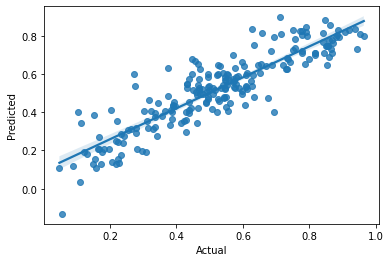

In [34]:
fn_print_message("Scatter Plot for Actual data points Vs Predicted data points")
corr_plot = sns.regplot(x=y_test, y=y_test_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

In [35]:
fn_print_message("Printing r2_score of Predicted Data")
r2_score(y_true=y_test, y_pred=y_test_pred)

--------------------------------------------------------------------------------
>> Printing r2_score of Predicted Data
--------------------------------------------------------------------------------



0.7991400079632173

### FINAL CONCLUSIONS

<hr>
<font color = blue >
        <ul>
        <li> <b> BEST FIT LINE EQUATION </b> <br>
            <font color = green> cnt = 0.0779 (const) + 0.2337 * yr + 0.0544 * workingday + 0.5409 * atemp - 0.1337 * windspeed + 0.0987 * season_2 + 0.1320 * season_4 + 0.0650 * mnth_8 + 0.1163 * mnth_9 + 0.0648 * weekday_6 - 0.0837 * weathersit_2 - 0.2802 * weathersit_3</font>
        <li> <b> INFERENCES </b> <br>
          -- BoomBikes should try to increase demand/sales in seasons (Spring and Winter) and months (Aug and Sep) as these have positive coefficients  <br>
          -- Negative Weather situtions decrease demand/sales as indicated by the negative coefficients of windspeed, weathersit_2 and weathersit_3
            
</font>
</hr>